<a href="https://colab.research.google.com/github/AustinMetzkes/Austin_Kindr/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [0]:

import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype


url = "https://raw.githubusercontent.com/FHU/young-people-survey/master/responses.csv"
data = pd.read_csv(url)

data_df = pd.DataFrame(data)

#create dataframe with only the columns I want
data_df = data_df[['Religion', 'God', 'Personality', 'Reliability', 'Final judgement', 'Energy levels',
         'Happiness in life', 'Smoking', 'Alcohol', 'Lying', 'Assertiveness', 'Getting angry',
         'Cheating in school', 'Criminal damage', 'Finding lost valuables']]


print(data_df.head(3))

   Religion  God  Personality  Reliability  Final judgement  Energy levels  \
0       1.0  1.0          4.0          4.0              5.0            5.0   
1       1.0  1.0          3.0          4.0              1.0            3.0   
2       5.0  5.0          3.0          4.0              3.0            4.0   

   Happiness in life        Smoking      Alcohol      Lying  Assertiveness  \
0                4.0   never smoked  drink a lot      never            1.0   
1                4.0   never smoked  drink a lot  sometimes            2.0   
2                4.0  tried smoking  drink a lot  sometimes            3.0   

   Getting angry  Cheating in school  Criminal damage  Finding lost valuables  
0            1.0                 2.0              1.0                     3.0  
1            5.0                 4.0              1.0                     4.0  
2            4.0                 3.0              1.0                     3.0  


initial prediction, predict the happiness level of people based on their energy level, religion, personality,  and God responses. and do the same with immoral values and compare the two

# Cleaning Categorical Data

In [0]:

#Drops any NaN values
data_df = data_df.dropna(how='any')


#print(data_df)
#print(data_df.dtypes)

#
cleanup_nums = {"Smoking":{"never smoked": 1.0, "tried smoking": 2.0, "former smoker": 3.0, "current smoker": 4.0},
                "Alcohol": {"never": 1.0, "social drinker": 2.0, "drink a lot": 3.0},
                "Lying":{"never": 1.0, "only to avoid hurting someone": 2.0, "sometimes": 3.0, "everytime it suits me": 4.0},
                "Happiness in life":{4.0: 5.0}
               }

data_df.replace(cleanup_nums, inplace = True)
print(data_df)

      Religion  God  Personality  Reliability  Final judgement  Energy levels  \
0          1.0  1.0          4.0          4.0              5.0            5.0   
1          1.0  1.0          3.0          4.0              1.0            3.0   
2          5.0  5.0          3.0          4.0              3.0            4.0   
3          4.0  4.0          2.0          3.0              1.0            2.0   
4          4.0  5.0          3.0          5.0              5.0            5.0   
5          2.0  3.0          3.0          3.0              1.0            4.0   
6          1.0  5.0          3.0          4.0              3.0            4.0   
7          2.0  4.0          4.0          3.0              3.0            4.0   
8          2.0  5.0          3.0          5.0              5.0            1.0   
9          4.0  5.0          3.0          4.0              5.0            4.0   
10         2.0  4.0          3.0          4.0              3.0            3.0   
11         1.0  1.0         

# Classifiers

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

class KNNTest:

  def __init__(self):
    self.name = 'K-Nearest Neighbor'

  def compute(self, features, labels):
    neigh = KNeighborsClassifier(n_neighbors=3)
    scores = cross_val_score(neigh, features, labels, cv=5)
    return scores
  
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

class LogisticRegressionTest:
  
  def __init__(self):
    self.name = 'Logistic Regression'
  
  def compute(self, features, labels):
    regressor = LogisticRegression(penalty='l2', solver='lbfgs', C=0.2)
    scores = cross_val_score(regressor, features, labels, cv=5)
    return scores
  
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

class DecisionTreeTest:
  
  def __init__(self):
    self.name = 'Decision Tree'

  def compute(self, features, labels):
    regressor = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=7)
    scores = cross_val_score(regressor, features, labels, cv=5)
    return scores
  
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

class NaiveBayesTest:

  def __init__(self):
    self.name = 'Naive Bayes'
  
  def compute(self, features, labels):
    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, features, labels, cv=5)
    return scores
  
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

class RandomForestTest:
  
  def __init__(self):
    self.name = 'Random Forest'

  def compute(self, features, labels):
    rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
    scores = cross_val_score(rf, features, labels, cv=5)
    return scores
  
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

class SVCTest:

  def __init__(self):
    self.name = 'SVC'

  def compute(self, features, labels):
    svc = SVC(C=0.2, gamma='auto', kernel='poly')
    scores = cross_val_score(svc, features, labels, cv=5)
    return scores
  
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

class AdaBoostTest:

  def __init__(self):
    self.name = 'Ada Boost'

  def compute(self, features, labels):
    svc = SVC(C=0.2, gamma='auto', kernel='poly')

    boost = AdaBoostClassifier(svc, algorithm='SAMME')

    scores = cross_val_score(boost, features, labels, cv=5)
    return scores
  


# training


In [0]:
from sklearn.model_selection import train_test_split


#X_good = data_df[['Religion', 'God', 'Personality', 'Reliability', 'Final judgement', 'Energy levels']]
#X_bad = data_df[['Smoking', 'Alcohol', 'Lying', 'Assertiveness', 'Getting angry',
#         'Cheating in school', 'Criminal damage', 'Finding lost valuables']]
y = data_df['Happiness in life']
X = data_df.drop('Happiness in life', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Neural Networks

In [0]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(19,19,19),max_iter=10000)

mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant', 
       learning_rate_init=0.001, max_iter=7000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

predictions = mlp.predict(X_test)


from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))


print(classification_report(y_test,predictions))

[[  2   1   0   0]
 [  2   2   3   2]
 [  1   5  16  34]
 [  0   6  38 126]]
             precision    recall  f1-score   support

        1.0       0.40      0.67      0.50         3
        2.0       0.14      0.22      0.17         9
        3.0       0.28      0.29      0.28        56
        5.0       0.78      0.74      0.76       170

avg / total       0.63      0.61      0.62       238



# Running classifiers

SVC: 0.6282433108534146
Random Forest: 0.6618202908682183
Logistic Regression: 0.6523352900457823
Naive Bayes: 0.6679829070373112
K-Nearest Neighbor: 0.5891894207308714
Decision Tree: 0.5914697960358583
Ada Boost: 0.5871111419524632


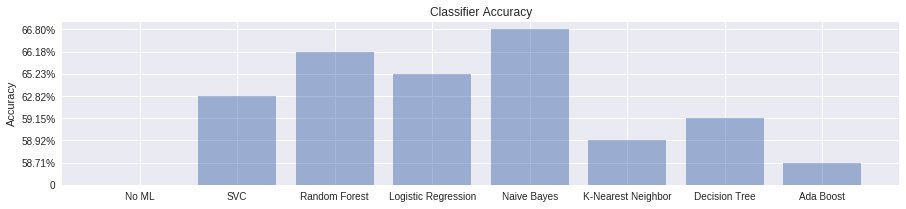

In [0]:
import numpy as np
from sklearn.preprocessing import Imputer
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

classifiers = [
  SVCTest(),
  RandomForestTest(),
  LogisticRegressionTest(),
  NaiveBayesTest(),
  KNNTest(),
  DecisionTreeTest(),
  AdaBoostTest()
]



imputer = Imputer()


classifier_names = ['No ML']
accuracies = []

for classifier in classifiers:
  classifier_names += [classifier.name]
  scores = classifier.compute(X, y)
  print(classifier.name + ": " + str(scores.mean()))
  accuracies += ['{:.2%}'.format(scores.mean())]

x = np.arange(len(classifier_names))

plt.figure(figsize=(15, 3))
plt.bar(x, [0] + accuracies, align='center', alpha=0.5)
plt.xticks(x, classifier_names)
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')
plt.show()